when does the person work-out, 
how many steps he took on daily basis, 
what are his active times etc.

Q1. As a part of the assessment you are supposed to analyse the logs from https://github.com/logpai/loghub/tree/master/HealthApp and build analytics solutions i.e. when does the person work-out, how many steps he took on daily basis, what are his active times etc. The more analytics you generate better it will be for evaluation. Analytics should have better visualisation in form of graphs. Use Python or Java as the language of choice
If you want to share any documents or files, please upload it on Google Drive or Dropbox and paste the public link in the answer.

In [1]:
import pandas as pd
import csv

In [2]:
data = 'HealthApp_2k.log_structured.csv'
df = pd.read_csv(data)

In [3]:
df.head()


,LineId,Time,Component,Pid,Content,EventId,EventTemplate
0,1,20171223-22:15:29:606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>
1,2,20171223-22:15:29:615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>
2,3,20171223-22:15:29:633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON
3,4,20171223-22:15:29:635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...
4,5,20171223-22:15:29:635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data


In [4]:
df.shape

(2000, 7)

In [5]:
df.isnull().sum()

LineId           0
Time             0
Component        0
Pid              0
Content          0
EventId          0
EventTemplate    0
dtype: int64

In [6]:
df.columns

Index(['LineId', 'Time', 'Component', 'Pid', 'Content', 'EventId',
       'EventTemplate'],
      dtype='object')

In [7]:
df.dtypes

LineId            int64
Time             object
Component        object
Pid               int64
Content          object
EventId          object
EventTemplate    object
dtype: object

In [8]:
df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%d-%H:%M:%S:%f')

In [9]:
df['Time'].dt.date.unique()
a=df['EventId'].unique()
a.size

75

array([[<Axes: title={'center': 'LineId'}>,
        <Axes: title={'center': 'Time'}>],
       [<Axes: title={'center': 'Pid'}>, <Axes: >]], dtype=object)

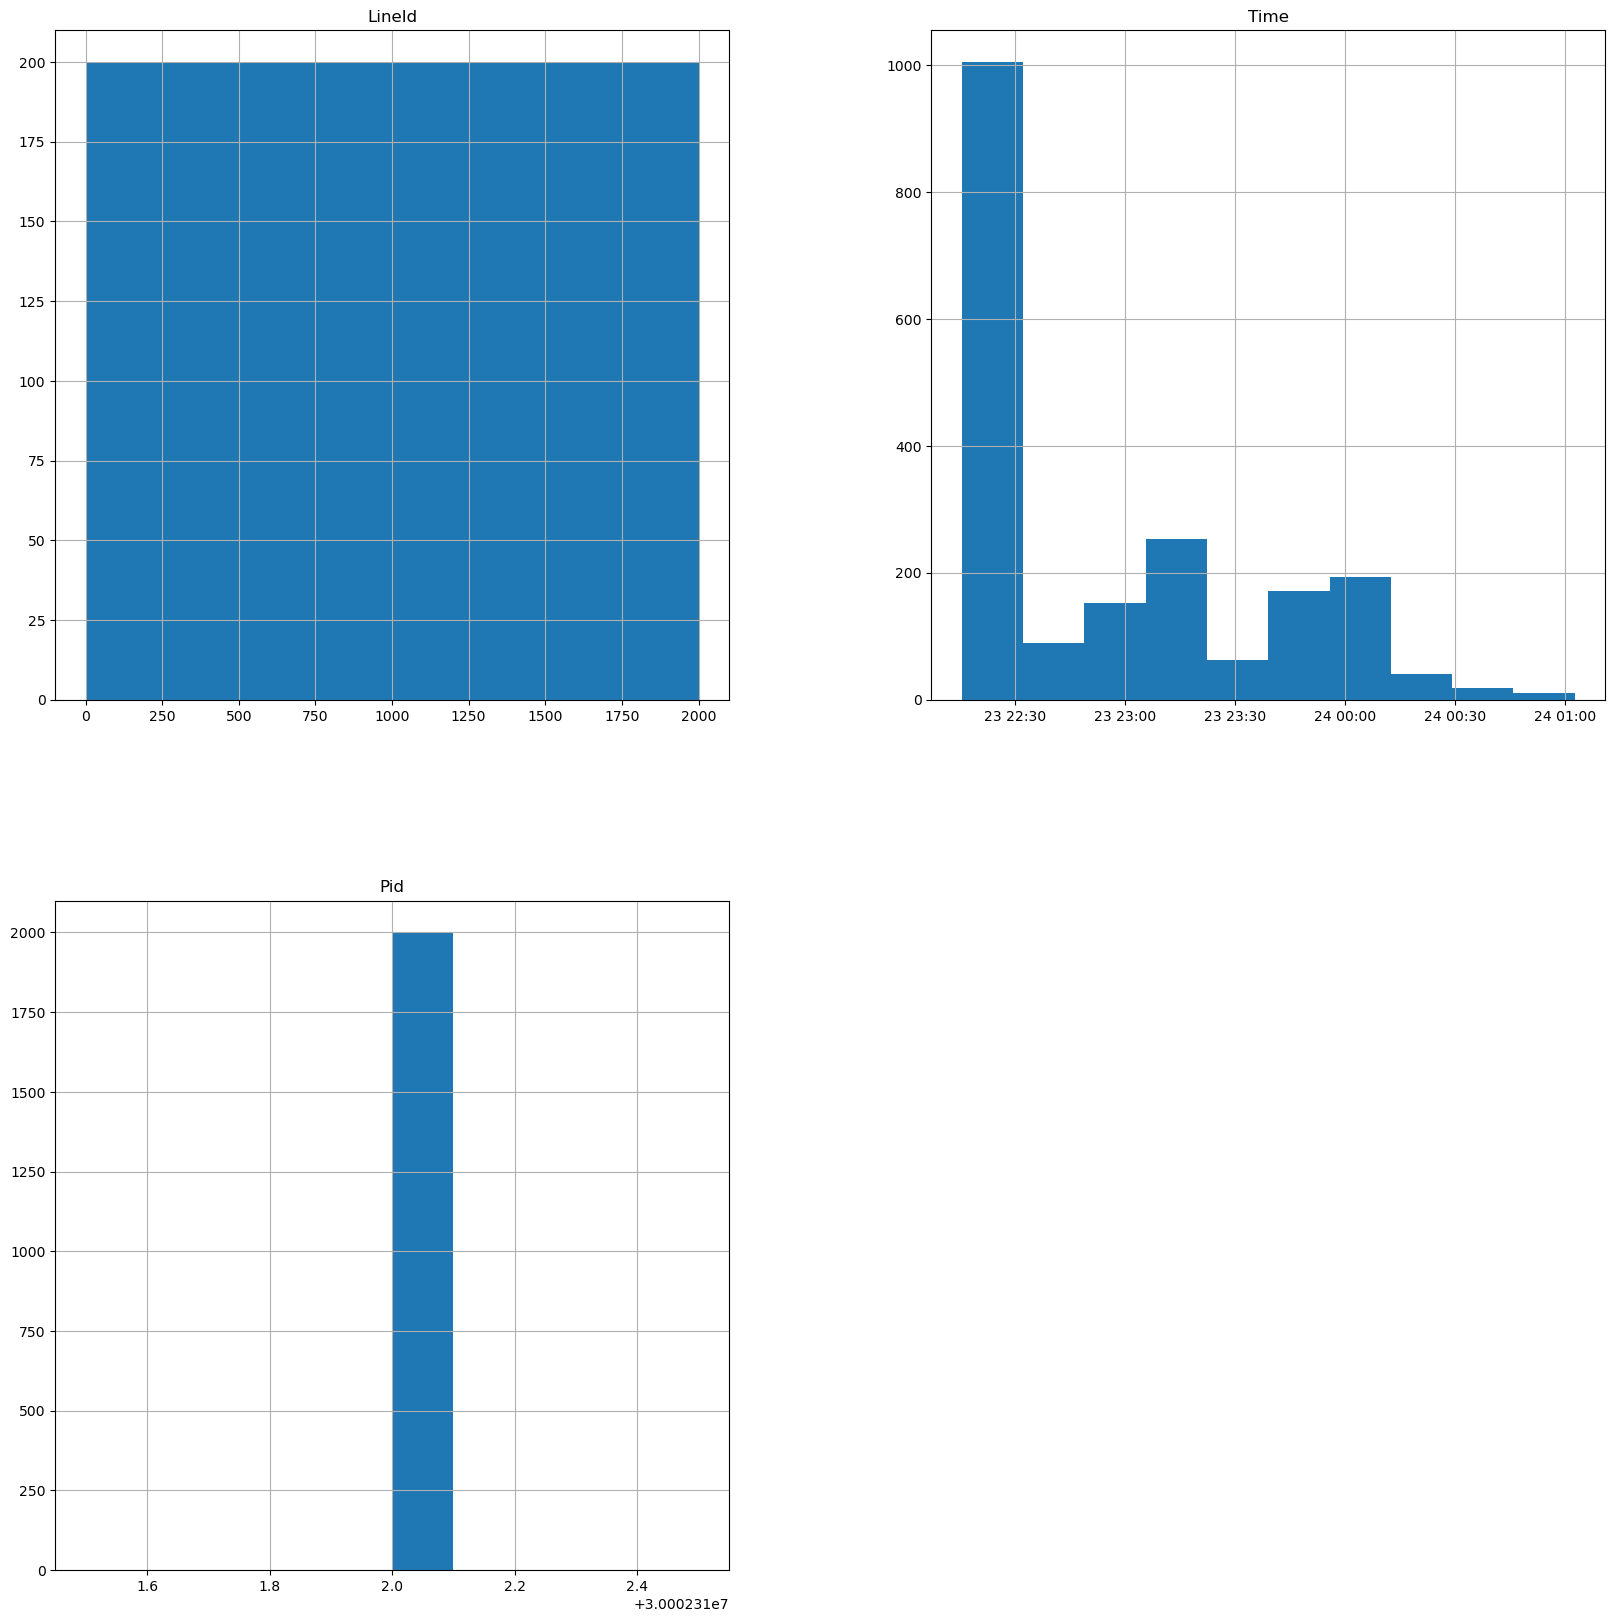

In [10]:
df.hist(figsize=(20,20))

# Maximum entry is on 23 dec 2017 around  time -  22:30

In [11]:
df.drop(['Pid'], axis=1 , inplace=True)

In [12]:
df.drop(['EventTemplate'], axis=1 , inplace=True)

In [13]:
#df['Component'].unique().size
df['Component'].unique()

array(['Step_LSC', 'Step_StandReportReceiver', 'Step_StandStepCounter',
       'Step_SPUtils', 'Step_ExtSDM', 'Step_ScreenUtil',
       'Step_FlushableStepDataCache', 'HiH_HiAppUtil',
       'HiH_HiHealthBinder', 'HiH_HiHealthDataInsertStore',
       'HiH_DataStatManager', 'HiH_ListenerManager', 'HiH_HiSyncControl',
       'HiH_HiSyncUtil', 'HiH_', 'HiH_HiBroadcastUtil',
       'Step_StandStepDataManager', 'Step_DataCache', 'Step_HGNH',
       'Step_NotificationUtil'], dtype=object)

In [14]:
df.drop(['Component'], axis=1 , inplace=True)

In [18]:
df['Date'] = df['Time'].dt.date

In [28]:
df.head()
#df.dtypes
#df.shape

,LineId,Time,Content,EventId,Date
0,1,2017-12-23 22:15:29.606,onStandStepChanged 3579,E42,2017-12-23
1,2,2017-12-23 22:15:29.615,onExtend:1514038530000 14 0 4,E39,2017-12-23
2,3,2017-12-23 22:15:29.633,onReceive action: android.intent.action.SCREEN_ON,E41,2017-12-23
3,4,2017-12-23 22:15:29.635,processHandleBroadcastAction action:android.in...,E43,2017-12-23
4,5,2017-12-23 22:15:29.635,flush sensor data,E12,2017-12-23


In [28]:
df['Date'].unique().size
df['Date'].unique()

array([datetime.date(2017, 12, 23), datetime.date(2017, 12, 24)],
      dtype=object)

In [25]:
clories = df[df['EventId']=='E4']

In [29]:
clories.shape

(241, 5)

In [27]:

clories.to_csv('calories_data_entry.csv', index=False)

In [30]:
AltitudeWith = df[df['EventId']=='E3']

In [31]:
AltitudeWith.shape

(241, 5)

In [32]:
AltitudeWith.to_csv('AltitudeWith_entry.csv', index=False)

In [33]:
TotalDetailSteps = df[df['EventId']=='E58']

In [35]:
TotalDetailSteps.shape

(241, 5)

In [ ]:
TotalDetailSteps.to_csv('TotalDetailSteps_entry.csv', index=False)